In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx
import missingno as msno

In [133]:
weather_data = pd.read_csv(r"https://github.com/sukhioo7/dataset/blob/main/weather_classification_data.csv?raw=true")

In [134]:
weather_data.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [135]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [136]:
weather_data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

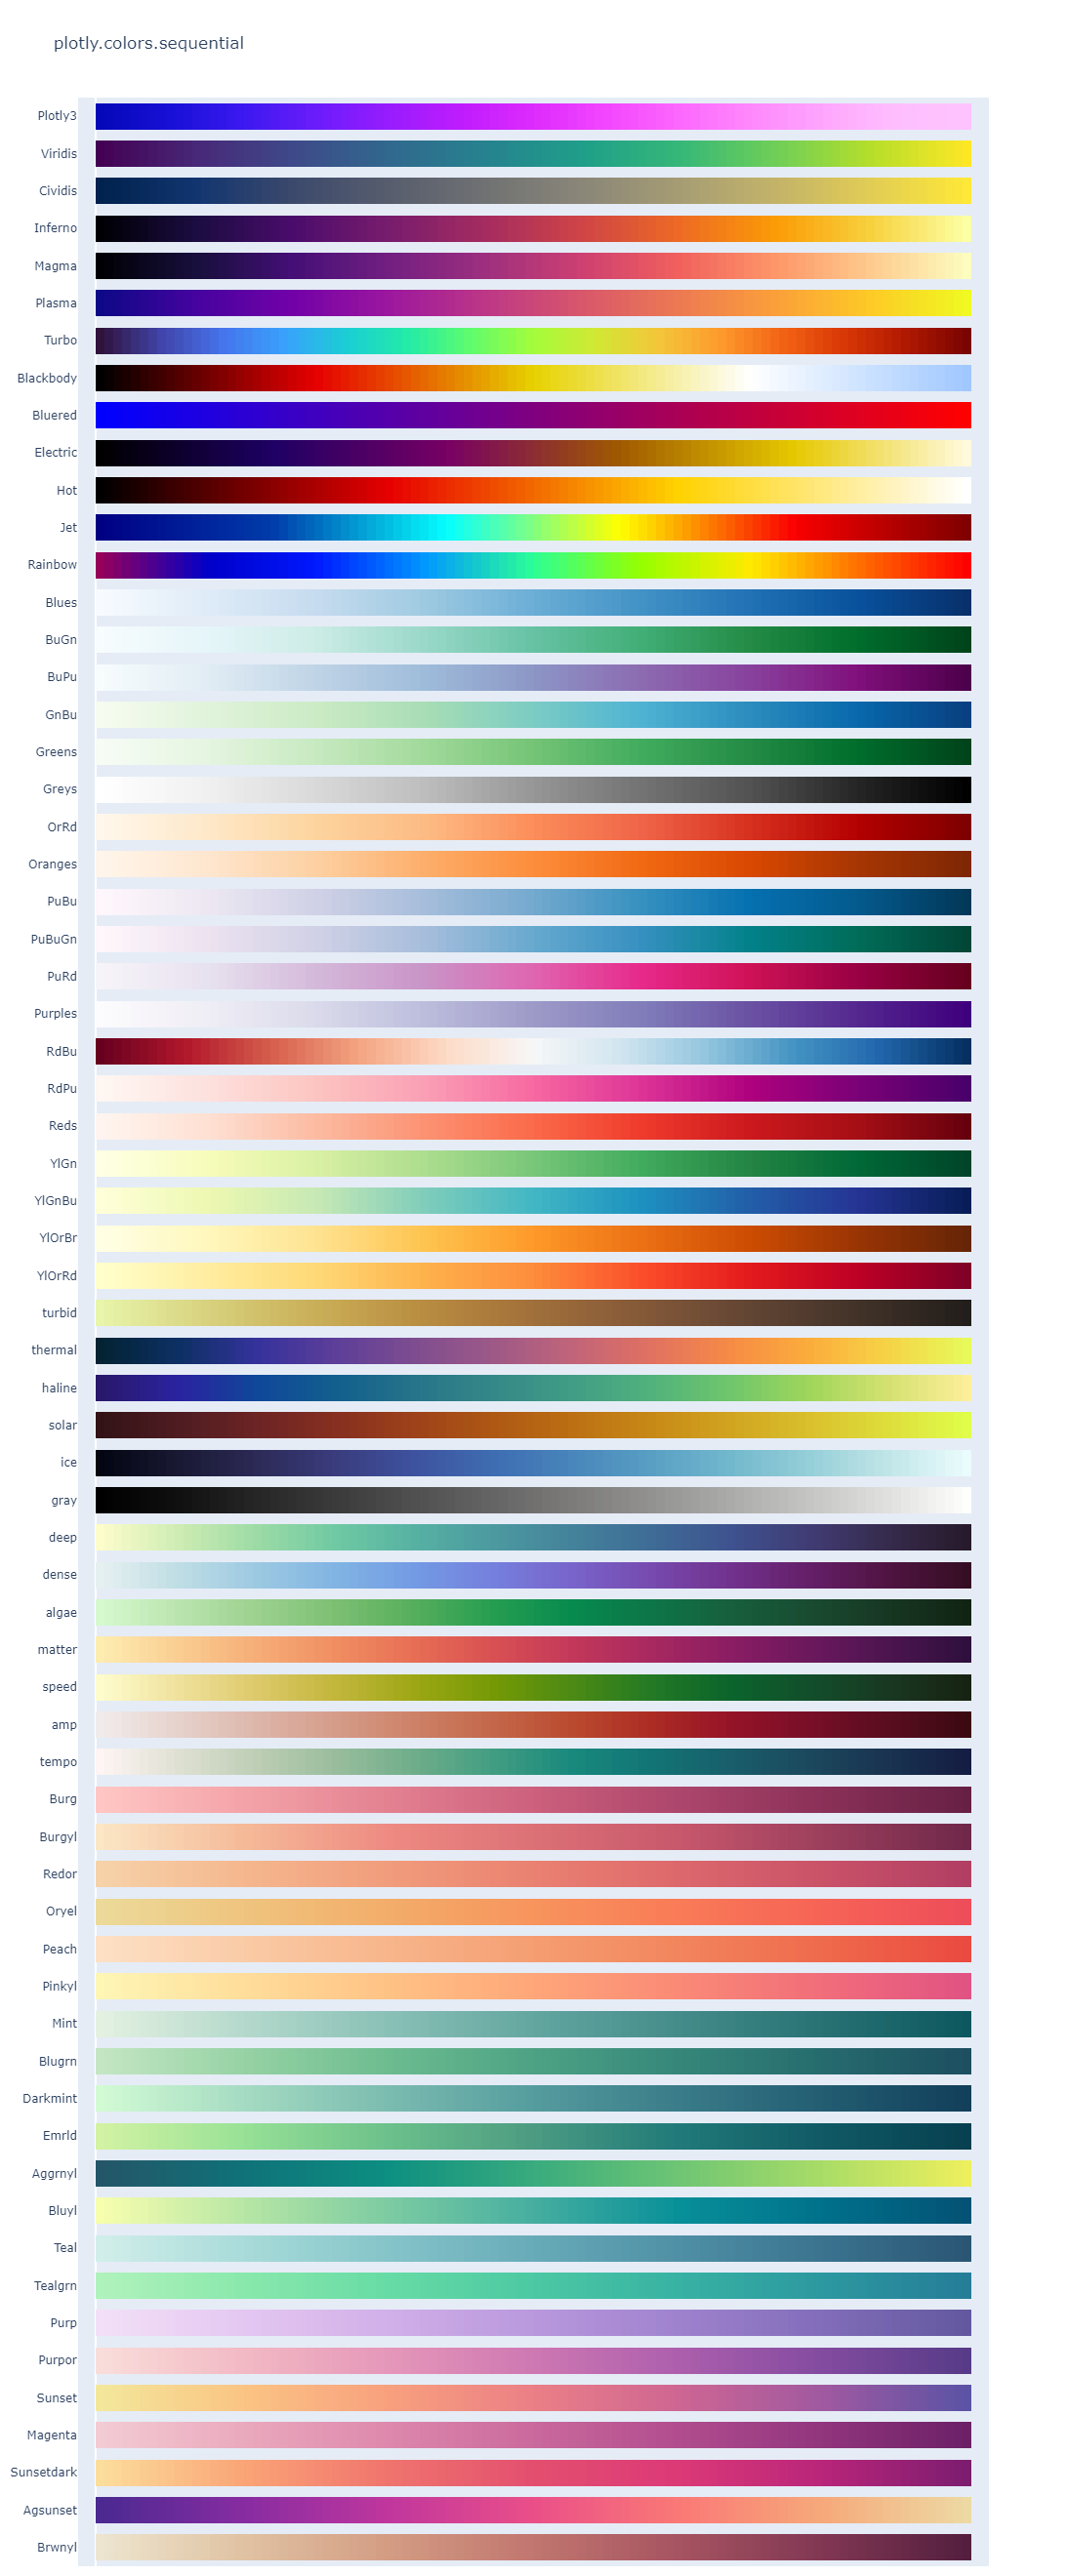

In [137]:
fig = plx.colors.sequential.swatches_continuous()
fig.show()

In [138]:
template = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]

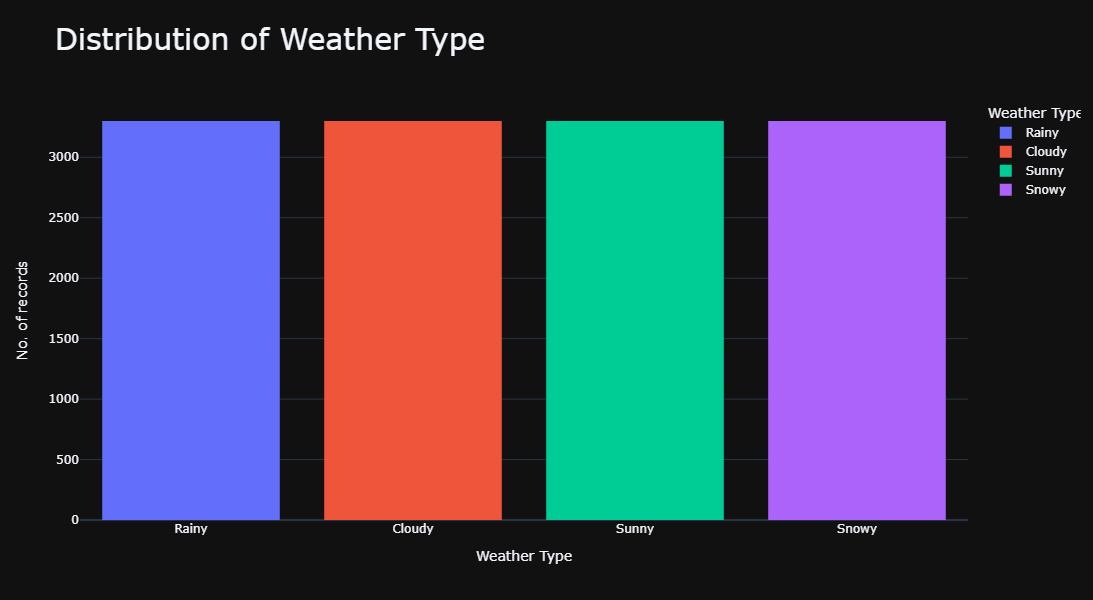

In [139]:
fig = plx.histogram(weather_data,x='Weather Type',title='Distribution of Weather Type',color='Weather Type')
fig.update_layout(
    title_font_size=30,
    height=600,
    xaxis_title='Weather Type',
    yaxis_title='No. of records',
    template=template[2],
)
fig.show()

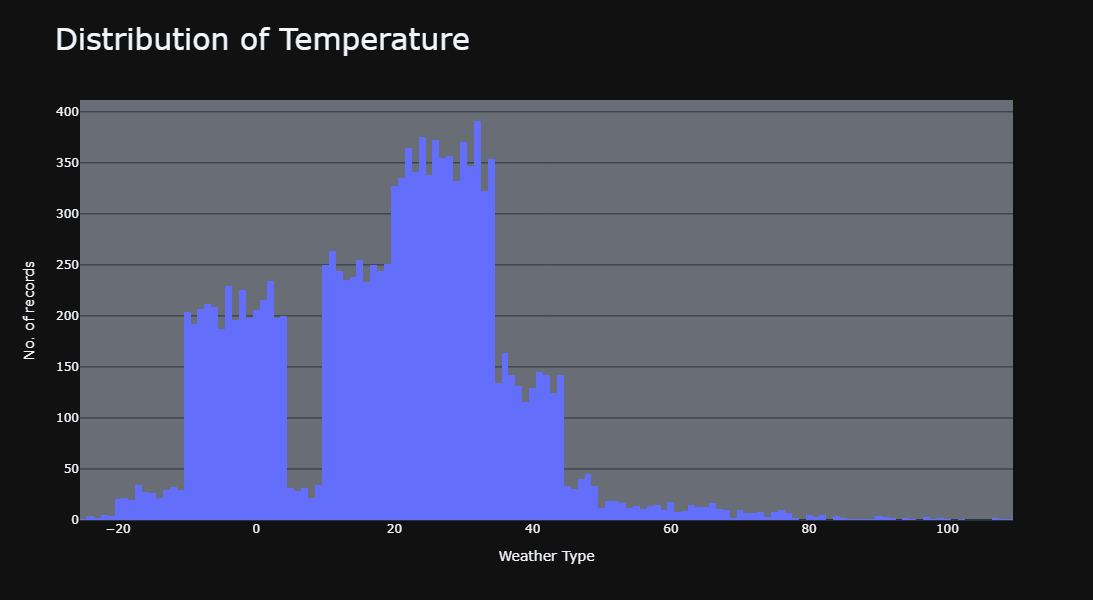

In [140]:
fig = plx.histogram(weather_data,x='Temperature',title='Distribution of Temperature')
fig.update_layout(
    title_font_size=30,
    height=600,
    xaxis_title='Weather Type',
    yaxis_title='No. of records',
    template=template[2],
    plot_bgcolor='#686D76'
)
fig.show()

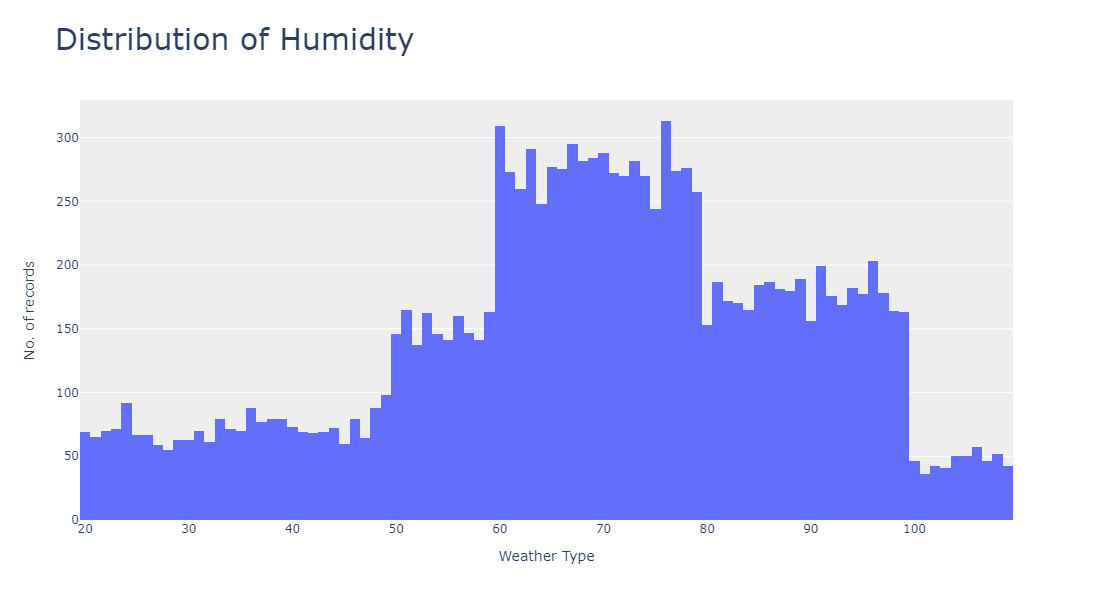

In [141]:
fig = plx.histogram(weather_data,x='Humidity',title='Distribution of Humidity')
fig.update_layout(
    title_font_size=30,
    height=600,
    xaxis_title='Weather Type',
    yaxis_title='No. of records',
    template=template[0],
    plot_bgcolor='#EEEEEE'
)
fig.show()

In [142]:
# barmode (str (default 'relative' )) – One of 'group' , 'overlay' or 'relative' 

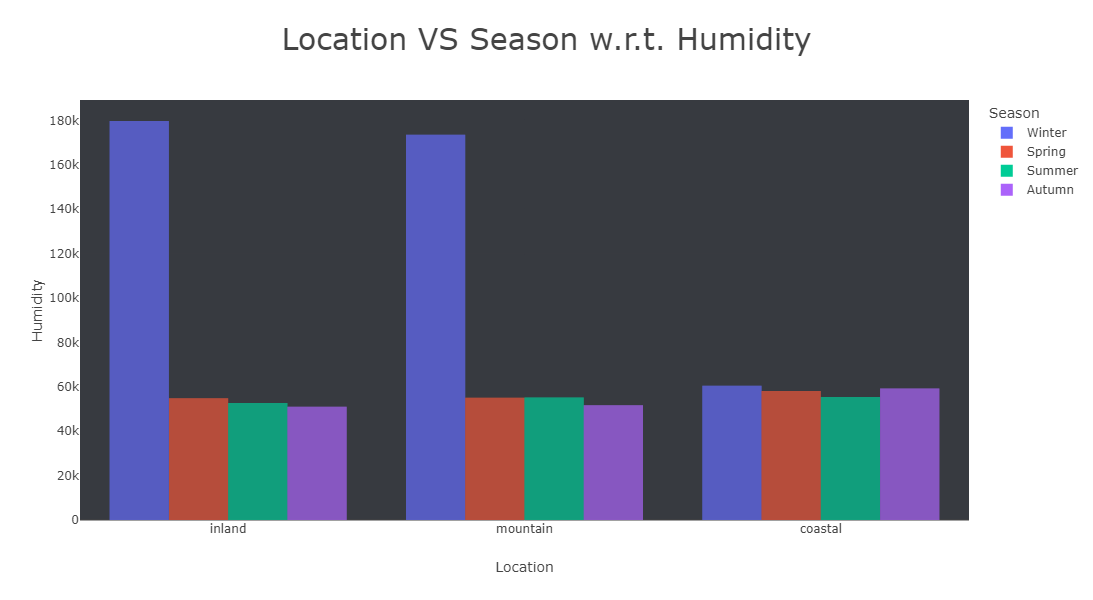

In [143]:
fig = plx.bar(weather_data,x='Location',y='Humidity',title='Location VS Season w.r.t. Humidity',
              color='Season',barmode='group')
fig.update_layout(
    title_font_size=30,
    height=600,
    template=template[6],
    plot_bgcolor='#373A40'
)
fig.show()

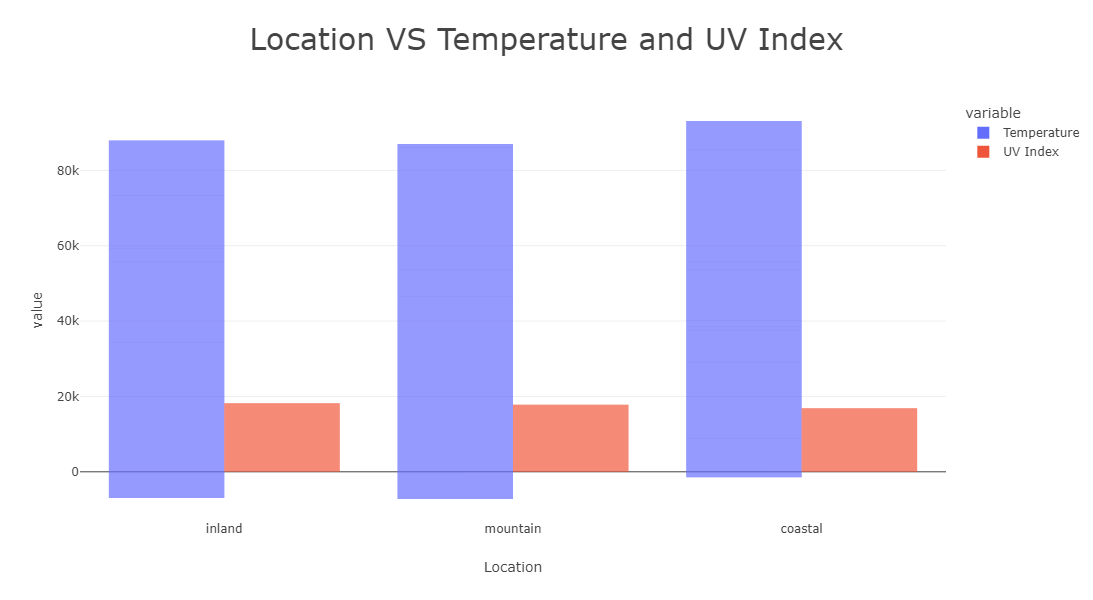

In [144]:
fig = plx.bar(weather_data,x='Location',y=['Temperature','UV Index'],title='Location VS Temperature and UV Index',barmode='group')
fig.update_layout(
    title_font_size=30,
    height=600,
    template=template[6],
    # plot_bgcolor='#373A40'
)
fig.show()

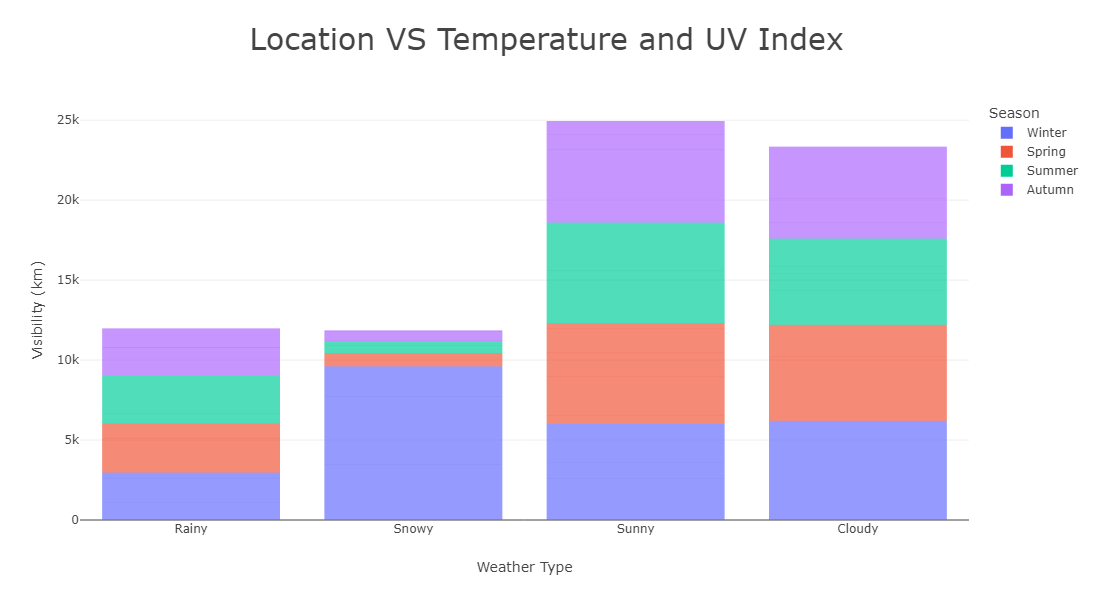

In [145]:
fig = plx.bar(weather_data,x='Weather Type',y='Visibility (km)',title='Location VS Temperature and UV Index',color='Season')
fig.update_layout(
    title_font_size=30,
    height=600,
    template=template[6],
    # plot_bgcolor='#373A40'
)
fig.show()

In [146]:
co_relation = weather_data.corr(numeric_only=True)

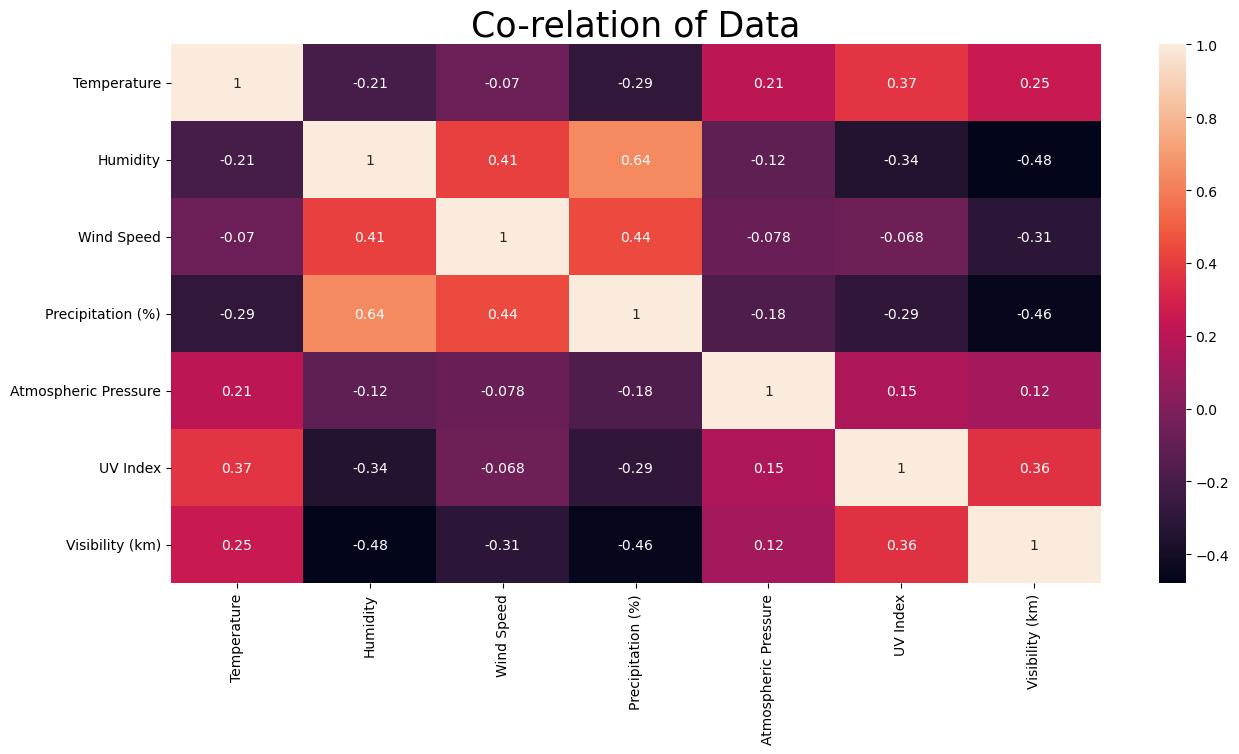

In [147]:
plt.figure(figsize=(15,7))
sns.heatmap(co_relation,annot=True)
plt.title('Co-relation of Data',size=25)
plt.show()

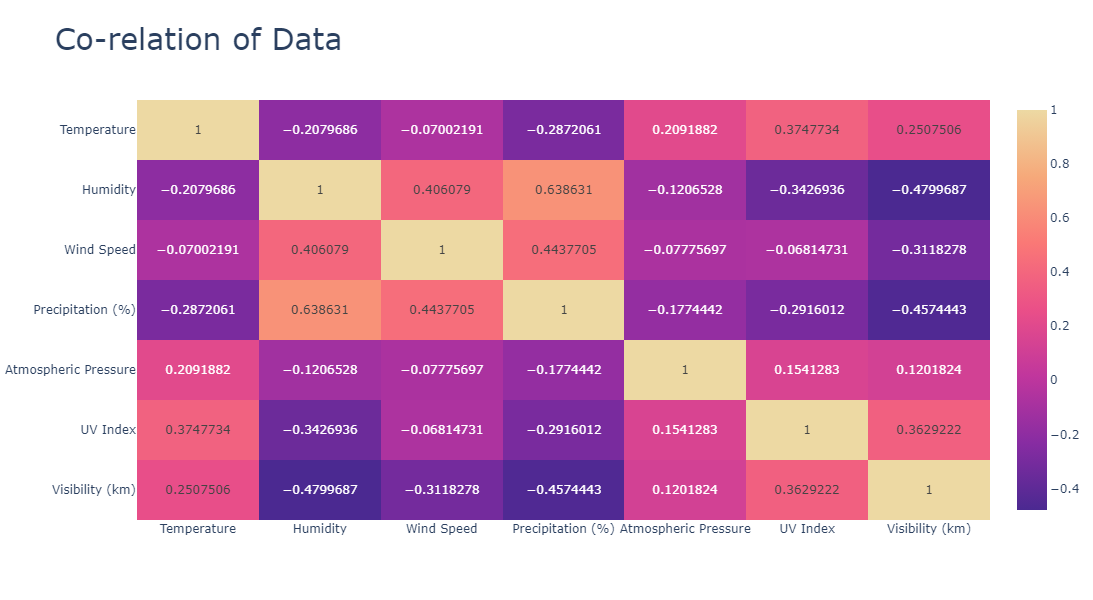

In [148]:
fig = plx.imshow(co_relation, text_auto=True, aspect="auto",title='Co-relation of Data',
                 color_continuous_scale='Agsunset')
fig.update_layout(
    title_font_size=30,
    height=600,
    template=template[1],
    # plot_bgcolor='#373A40'
)
fig.show()

In [149]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

In [150]:
one_hot_encoder.fit(weather_data[['Cloud Cover','Season','Location']])

OneHotEncoder()

In [151]:
temp_arr = one_hot_encoder.transform(weather_data[['Cloud Cover','Season','Location']]).toarray()

In [152]:
temp_arr

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [153]:
one_hot_encoder.categories_

[array(['clear', 'cloudy', 'overcast', 'partly cloudy'], dtype=object),
 array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 array(['coastal', 'inland', 'mountain'], dtype=object)]

In [154]:
temp_data = pd.DataFrame(temp_arr,columns=['clear', 'cloudy', 'overcast', 'partly cloudy',
            'Autumn', 'Spring', 'Summer', 'Winter','coastal', 'inland', 'mountain'],
            dtype='int')

In [155]:
temp_data.head()

clear  cloudy  overcast  partly cloudy  Autumn  Spring  Summer  Winter  \
0      0       0         0              1       0       0       0       1   
1      0       0         0              1       0       1       0       0   
2      1       0         0              0       0       1       0       0   
3      1       0         0              0       0       1       0       0   
4      0       0         1              0       0       0       0       1   

   coastal  inland  mountain  
0        0       1         0  
1        0       1         0  
2        0       0         1  
3        1       0         0  
4        0       0         1

In [156]:
weather_data = pd.concat([weather_data,temp_data],axis=1)

In [157]:
weather_data.drop(['Cloud Cover','Season','Location'],axis=1,inplace=True)

In [158]:
weather_data.head()

Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0         14.0        73         9.5               82.0               1010.82   
1         39.0        96         8.5               71.0               1011.43   
2         30.0        64         7.0               16.0               1018.72   
3         38.0        83         1.5               82.0               1026.25   
4         27.0        74        17.0               66.0                990.67   

   UV Index  Visibility (km) Weather Type  clear  cloudy  overcast  \
0         2              3.5        Rainy      0       0         0   
1         7             10.0       Cloudy      0       0         0   
2         5              5.5        Sunny      1       0         0   
3         7              1.0        Sunny      1       0         0   
4         1              2.5        Rainy      0       0         1   

   partly cloudy  Autumn  Spring  Summer  Winter  coastal  inland  mountain  
0              1       0       0       0       1        0       1         0  
1              1       0       1       0       0        0       1         0  
2              0       0       1       0       0        0       0         1  
3              0       0       1       0       0        1       0         0  
4              0       0       0       0       1        0       0         1

In [159]:
X = weather_data.drop('Weather Type',axis=1)
Y = weather_data['Weather Type']

In [160]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [177]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7)

In [178]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [179]:
predictions = knn_model.predict(X_test)

In [180]:
from sklearn.metrics import classification_report

print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

      Cloudy       0.87      0.87      0.87       646
       Rainy       0.91      0.86      0.89       703
       Snowy       0.94      0.94      0.94       676
       Sunny       0.87      0.92      0.90       615

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



In [181]:
error = []
for k in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,Y_train)
    predictions = knn_model.predict(X_test)
    error.append(np.mean(predictions!=Y_test))

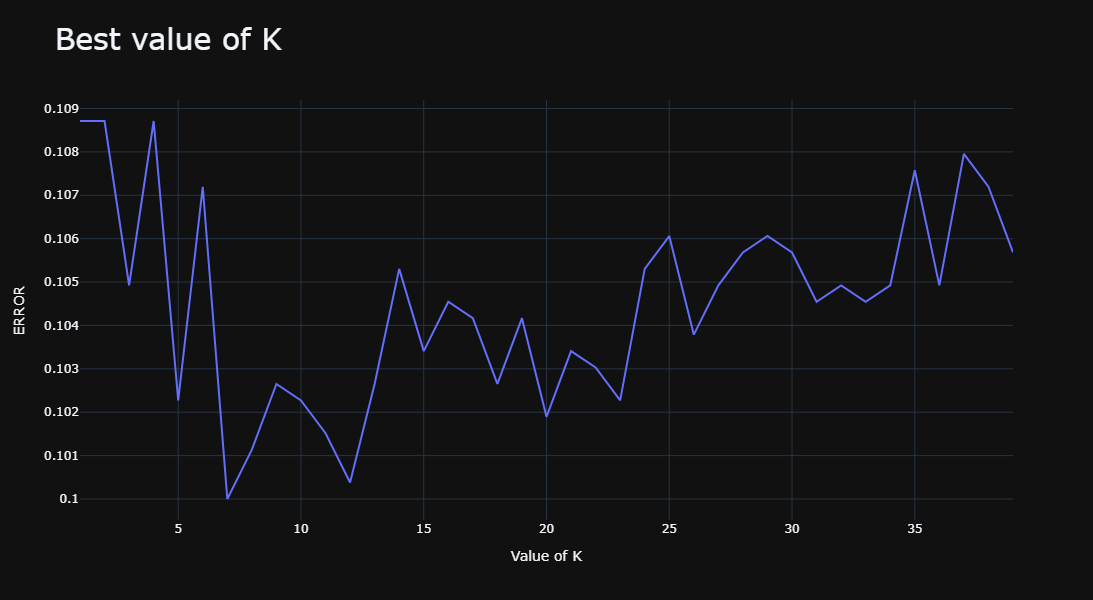

In [182]:
fig = plx.line(x=range(1,40),y=error,
              title='Best value of K')
fig.update_layout(
    height=600,
    xaxis_title='Value of K',
    yaxis_title='ERROR',
    title_font_size=30,
    # plot_bgcolor='rgb(50, 50, 50)',
    template='plotly_dark',
)
fig.show()